# Introduction

When working on R&D of gasesous detectors I tend to produce lots of plots for internal group discussions, conference presentations and publication publishing. Since most of these plots shows performance relative to gaseous detectors and since I am based at CERN I get to see lot of similar plots made by some other groups using [ROOT](https://root.cern.ch/), the de-facto standard analysis tool for high energy physics. 

If I really have to be honest I have never liked ROOT so much, although I understand it provides several useful tools, from plotting data and fitting functions to GUI toolkits. Most, if not all the plots regarding the discovery of the Higgs boson were produced using ROOT. The layout of ROOT plots is then recognized and approved by the majority of the community in high energy physics. 

If we have to compare a default plot made using root versus a default plot made with matplotlib, this would be the result

Warning in <TCanvas::Constructor>: Deleting canvas with same name: rate_vs_current


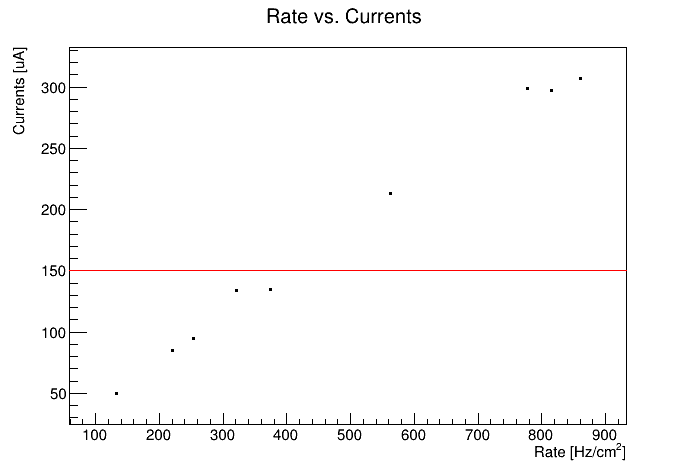

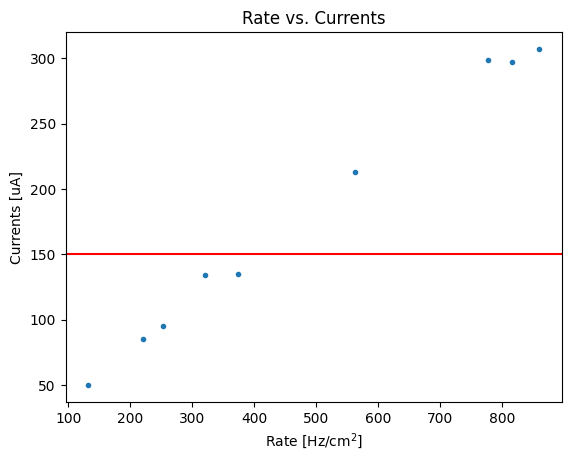

In [14]:
#| label: fig-default-matplotlib
#| fig-cap: 
#|   - "Default matplotlib plot"
#|   - "Default ROOT plot"
#| layout-ncol: 2
#| warning: false

import matplotlib.pyplot as plt
import ROOT as rt
import numpy as np

x = np.array([321.0, 860.0, 777.0, 562.0, 374.0, 132.0, 816.0, 220.0, 253.0])
y = np.array([134.0,307.0,299.0,213.0,135.0,50.0,297.0,85.0,95.0])

# Let's just make sure we are using the default settings now
plt.style.use('default')

# Matplotlib
fig, ax = plt.subplots()
ax.set(title='Rate vs. Currents', xlabel='Rate [Hz/cm$^2$]', ylabel='Currents [uA]')
ax.plot(x, y, '.')
ax.axhline(150, color='r')

# ROOT
canvas = rt.TCanvas("rate_vs_current", "Rate vs. Currents")
graph = rt.TGraph(len(x), x, y)
graph.SetTitle("Rate vs. Currents")
graph.SetMarkerStyle(7)
graph.GetXaxis().SetTitle("Rate [Hz/cm^{2}]")
graph.GetYaxis().SetTitle("Currents [uA]")
line = rt.TLine(graph.GetXaxis().GetXmin(), 150, graph.GetXaxis().GetXmax(), 150)
line.SetLineColor(rt.kRed)
graph.Draw('AP')
line.Draw("L")
canvas.Draw()

# Styling matplotlib plots
My goal here is to have the matplotlib plot to look a bit more like the ROOT one. I recently came to find that there is a python package called [mplhep](https://github.com/scikit-hep/mplhep) that is aiming at producing ROOT-like style plots used in high energy physics. I found the package to be really helpful, especially when there is the need to add some labels regarding collaborations. However, in my particular case, I noticed that the default axes ticks, labels, spines layout were matching more matplotlib defaults than ROOT ones. 

Before I came to know `mplhep` I decided to create my own [matplotlibrc](https://matplotlib.org/stable/tutorials/introductory/customizing.html#matplotlibrc-sample) file, which, as the name may suggest, is a file containing defaults used to style matplotlib plots.

If you have a look at the default `matplotlibrc` content, you could see that it is organized in sections. Within each section you can find a set of defaults.

```{.txt filename="default_matplotlibrc.txt"}
...
## Matplotlib configuration are currently divided into following parts:
##     - BACKENDS
##     - LINES
##     - PATCHES
##     - HATCHES
##     - BOXPLOT
##     - FONT
##     - TEXT
##     - LaTeX
##     - AXES
##     - DATES
##     - TICKS
##     - GRIDS
##     - LEGEND
##     - FIGURE
##     - IMAGES
##     - CONTOUR PLOTS
##     - ERRORBAR PLOTS
##     - HISTOGRAM PLOTS
##     - SCATTER PLOTS
##     - AGG RENDERING
##     - PATHS
##     - SAVING FIGURES
##     - INTERACTIVE KEYMAPS
##     - ANIMATION
...
```
I will detail the sections that I have modified to make plots look more like ROOT ones.

## LINES
In the `LINES` section the only default value that I have changed is the `lines.linewidth` set to 0.5, instead of the 1.5 default value.

## PATCHES
In the `PATCHES` section I have also decrease the `patch.linewidth` to 0.5

## FONT
For the font I haven't found any easy way to add a web font into matplotlib without adding some lines of code. For this reason I have installed GNU Free font
and modified the order of the `sans-serif` font to be: `Helvetica, FreeSans, Nimbus Sans, DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Avant Garde, sans-serif`

In the `FONT` section I have set `font.weight` to `regular` by default. 

## AXES and AXIS
In the `AXES` and `AXIS` sections I tweaked multiple lines. I will report only the modified lines:

```{.txt filename="my_matplotlibrc.txt"}
# AXES
axes.grid           : False   ## display grid or not
axes.labelsize      : x-large  ## fontsize of the x any y labels
axes.labelweight    : regular  ## weight of the x and y labels
axes.formatter.useoffset      : False    ## If True, the tick label formatter
axes.formatter.offset_threshold : 2     ## When useoffset is True, the offset
...
# AXIS
xaxis.labellocation: right  # alignment of the xaxis label: {left, right, center}
yaxis.labellocation: top  # alignment of the yaxis label: {bottom, top, center}

```

## TICKS
Matplotlib's tick layout is what differs the most from ROOT default's style. In this case the modified lines were the following:

```{.txt filename="my_matplotlibrc.txt"}
xtick.top            : True  ## draw ticks on the top side
xtick.major.size     : 8    ## major tick size in points
xtick.minor.size     : 4      ## minor tick size in points
xtick.major.width    : 0.5    ## major tick width in points
xtick.minor.width    : 0.5    ## minor tick width in points
xtick.major.pad      : 6    ## distance to major tick label in points
xtick.direction      : in    ## direction: in, out, or inout
xtick.minor.visible  : True  ## visibility of minor ticks on x-axis
ytick.right          : True   ## draw ticks on the right side
ytick.major.size     : 8      ## major tick size in points
ytick.minor.size     : 4      ## minor tick size in points
ytick.major.width    : 0.5    ## major tick width in points
ytick.minor.width    : 0.5    ## minor tick width in points
ytick.major.pad      : 6    ## distance to major tick label in points
ytick.direction      : in     ## direction: in, out, or inout
ytick.minor.visible  : True  ## visibility of minor ticks on y-axis
```

## GRID
Although I used to love grid, they might make the plot a bit "heavy" to read when there are several points and lines. For this reason I kept grids disabled:

```{.txt filename="my_matplotlibrc.txt"}
grid.color       :   k    ## black
grid.linestyle   :   --         ## dashed
grid.linewidth   :   0.5       ## in points
```

## LEGEND

Regardin the legend handling I got some inspirations by having a look at some common plots used within the community I am working with:
```{.txt filename="my_matplotlibrc.txt"}
legend.frameon       : True     ## if True, draw the legend on a background patch
legend.framealpha    : None      ## legend patch transparency
legend.edgecolor     : inherit      ## background patch boundary color
legend.fancybox      : False     ## if True, use a rounded box for the
                                 ## legend background, else a rectangle
legend.scatterpoints : 3        ## number of scatter points
legend.fontsize      : large
legend.handlelength  : 0.7      ## the length of the legend lines
legend.handleheight  : 1      ## the height of the legend handle
legend.handletextpad : 1.2      ## the space between the legend line and legend text
legend.borderaxespad : 1      ## the border between the axes and legend edge
```

## FIGURE
Although there are really no standard on the figure sizes I like a default 3:2 ratio and a minimum DPI of 300:
```{.txt filename="my_matplotlibrc.txt"}
figure.figsize   : 6, 4       ## figure size in inches
figure.dpi       : 300        ## figure dots per inch
```

## Other tweakings
I have set the cap size of the error bars, as by default is 0 and set the histogram binning to `"auto"`:
```{.txt filename="my_matplotlibrc.txt"}
errorbar.capsize : 1.5            ## length of end cap on error bars in pixels
hist.bins : auto                 ## The default number of histogram bins.
                                  ## If Numpy 1.11 or later is
                                  ## installed, may also be `auto`
```

# Final results

If I try to make again the plot in Figure @fig-default-matplotlib with these new defaults and put it side by side to a ROOT plot I get something like this:


Warning in <TCanvas::Constructor>: Deleting canvas with same name: rate_vs_current


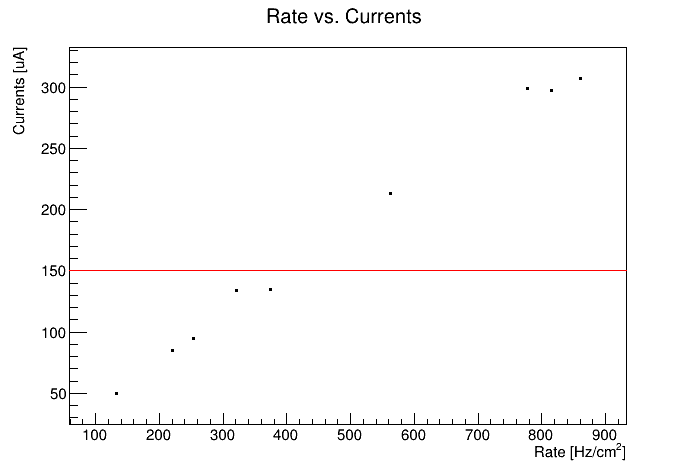

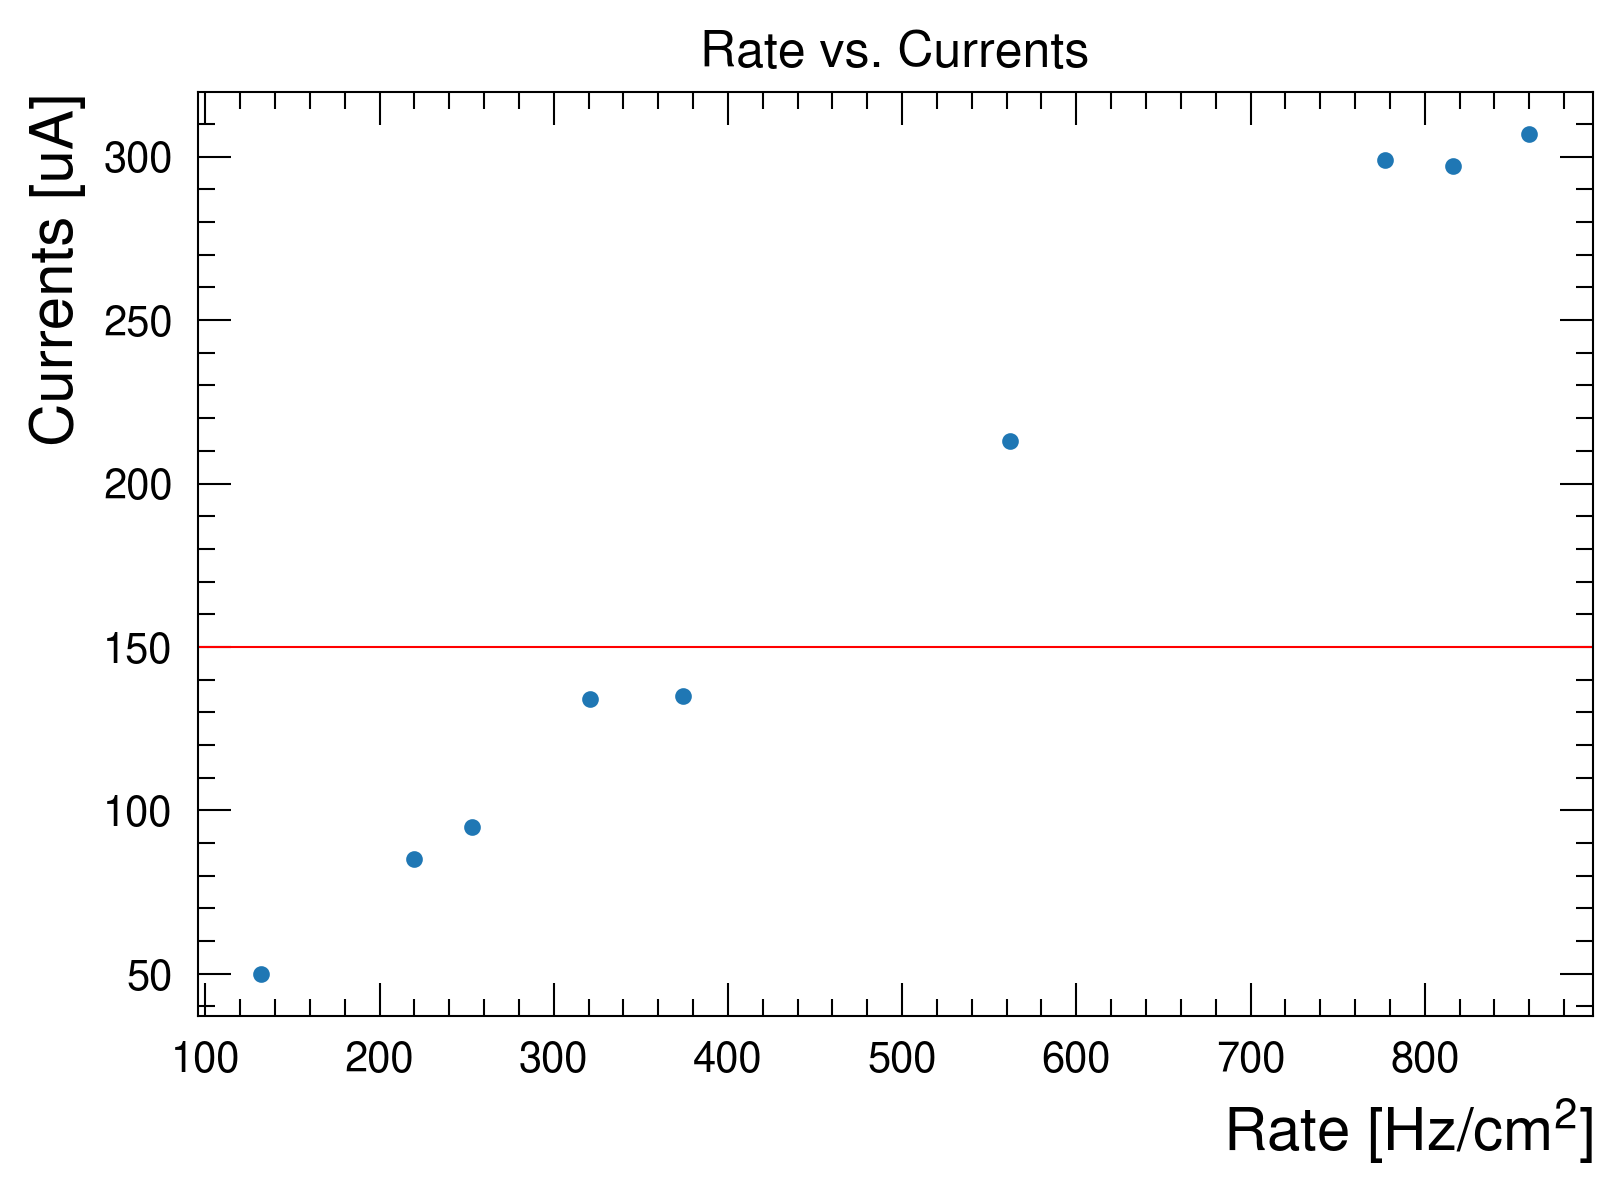

In [15]:
#| label: fig-new-default-matplotlib
#| fig-cap: 
#|   - "Custom matplotlib plot"
#|   - "Default ROOT plot"
#| layout-ncol: 2
#| warning: false

import matplotlib.pyplot as plt
import ROOT as rt
import numpy as np

x = np.array([321.0, 860.0, 777.0, 562.0, 374.0, 132.0, 816.0, 220.0, 253.0])
y = np.array([134.0,307.0,299.0,213.0,135.0,50.0,297.0,85.0,95.0])

# Use a context manager to plot only this plot with newer values
plt.style.use('https://gitlab.cern.ch/-/snippets/2223/raw/master/rpcecogas.mplstyle')
fig, ax = plt.subplots()
ax.set(title='Rate vs. Currents', xlabel='Rate [Hz/cm$^2$]', ylabel='Currents [uA]')
ax.plot(x, y, '.')
ax.axhline(150, color='r')

# ROOT
canvas = rt.TCanvas("rate_vs_current", "Rate vs. Currents")
graph = rt.TGraph(len(x), x, y)
graph.SetTitle("Rate vs. Currents")
graph.SetMarkerStyle(7)
graph.GetXaxis().SetTitle("Rate [Hz/cm^{2}]")
graph.GetYaxis().SetTitle("Currents [uA]")
line = rt.TLine(graph.GetXaxis().GetXmin(), 150, graph.GetXaxis().GetXmax(), 150)
line.SetLineColor(rt.kRed)
graph.Draw('AP')
line.Draw("L")
canvas.Draw()

As you can notice in @fig-new-default-matplotlib, the plots look similar. I have left a bigger x and y label titles for better readability and I have left the default `tab10` matplotlib palette for colors, as I don't like the palette handling in ROOT.

You can find the stylesheet I am currently using available as a gitlab snippet here: https://gitlab.cern.ch/-/snippets/2223 
There are couple of ways to use a stylesheet. The first, that applies globally, is to use `plt.style.use(url)`. The second instead, could be using a context
manager provided by matplotlib that allows to apply styles on a plot within the context manager itself. For more information, see the [matplotlib documentation on `rc_context`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.rc_context.html)
There is only one caveat that I noticed when writing this post: if I use `rc_context` then I have some issues loading the system's font and the plot will fallback to some defaults fonts. I don't know if this is a matplotlib bug or if it is related to my local machine. I will have to investigate

# Conclusions

In this post I highlighted the matplotlib configuration I changed to have default plots looking more like ROOT. I am making a heavy use of these styles and I have observed that very few people notice that difference between a ROOT like plot and one made with these defaults.

In the future I plan to revise a little bit the configuration to further improve the layout.